Histograma : Um histograma de uma imagem é a interpretação gráfica dos valores de intensidade de pixel da imagem. Pode ser interpretado como a estrutura de dados que armazena as frequências de todos os níveis de intensidade de pixel da imagem.

    - O nível de intensidade geralmente varia de 0 a 255. 

    - Para uma imagem em escala cinza, há apenas um histograma, enquanto uma imagem colorida RGB terá três histogramas 2-D - um para cada cor.

Equalização de histograma: Técnica de processamento de imagem que ajusta o contraste de uma imagem usando seu histograma. 

    - Para melhorar o contraste da imagem, ele distribui os valores de intensidade de pixel mais frequentes ou estende a faixa de intensidade da imagem. AO conseguir isso, a equalização do histograma permite que as áreas da imagem com menor constraste ganhem maior contraste.

    - Usada quando há imagens que parecem desbotadas sem contraste suficiente. Quando as áreas claras e escuras se misturam, criando uma imagem mais plana, sem realces e sombras.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = "flor.webp"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)

In [7]:
cv.imshow('imagem',img)
cv.waitKey(0) 
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kelly/.local/lib/python3.10/site-packages/cv2/qt/plugins"


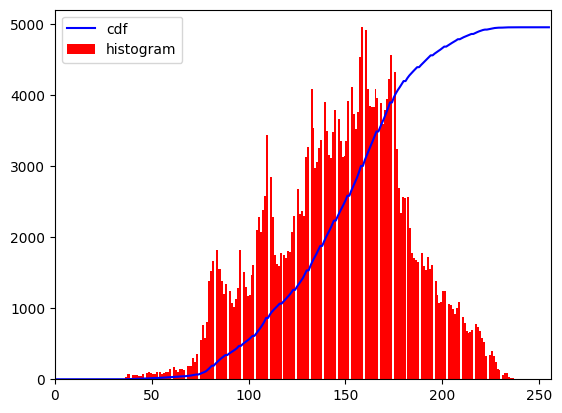

In [14]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

-> Sobre o histograma acima: a maioria da intensidade de pixel varia entre 125 e 175, com pico em torno de 150, No entanto, as áreas mais à esquerda e à direita não possuem nenhum valor de intensidade de pixel. Isso revela que a imagem teste tem baixo contraste.

In [5]:
equ = cv.equalizeHist(img)

In [17]:
cv.imshow('equ.png',equ)
cv.waitKey(0)
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kelly/.local/lib/python3.10/site-packages/cv2/qt/plugins"


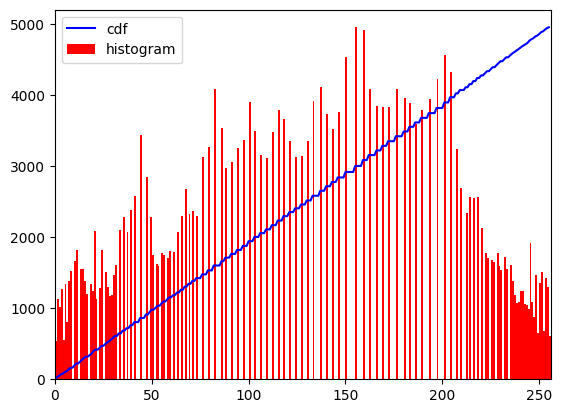

In [7]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()